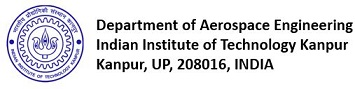

### AE646: SCIENTIFIC MACHINE LEARNING FOR FLUID MECHANICS

**Name: HARISH WATHORE
<br>
Roll Number: 20101017
<br>**

### AE-PCA Review Exercise/Self-Study and Exploration:
**Due on 11.10.2023 by 1159 hrs**


Revisit your GP01 Project to use the same data for this exercise. An Autoencoder code is supplied in a Jupyter Notebook which you can modify for your use. Alternatively,  you may develop your own in TensorFlow, pyTorch etc

1. Compress the velocity and pressure data you have used in GP01 to a latent space using a linear autoencoder and reconstruct the velocity and pressure field using the decoder. Compare your reconstructions with those from SVD/PCA presented in GP01. Assess the effect of the number of neurons in the latent space on the compression. 

2. Assess the impact of linear and nonlinear autoencoders on this data. Assess the impact of  activation functions for your nonlinear autoencoder reconstructions and compare with that from linear autoencoders.

3. Show variation of Loss Function MSE vs Epoch in addition to contour plots of reconstructed flow fields and the error between PCA/Linear AE and Nonlinear AE Reconstructions of the same data. Include statements on your observations and comments on the key lessons learnt from this exercise.

4. (Research Question -Optional/Bonus). Assume that the reconstructed data from your linear autoencoder is augmented with a physics informed Incompressible Navier-Stokes loss function during the training of the AE. (a) Develop the formulation. (b) Compare the reconstruction from the decoder with the original data and that from the plain-vanilla AE used in Part 2.

A Sample AE/PCA code on the reconstruction of an encoded image is available in the public domain at https://github.com/mungoliabhishek/PCA-versus-AE/blob/master/Workbook_upload.ipynbis and is embedded in this notebook for your use. You may modify this code to input and encode the airfoil flowfield data from your GP01 to replace the image. Then enter your solutions to the tasks and questions in this notebook.

### 1. Install Libraries

In [1]:
!pip install pyvista

     |████████████████████████████████| 1.6 MB 11.9 MB/s            
     |████████████████████████████████| 3.6 MB 73.2 MB/s            
     |████████████████████████████████| 79.3 MB 192.6 MB/s            B 97.3 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 70.5 MB/s            
     |████████████████████████████████| 62 kB 4.9 MB/s             
     |████████████████████████████████| 1.2 MB 64.6 MB/s            
     |████████████████████████████████| 301 kB 120.2 MB/s            
     |████████████████████████████████| 4.6 MB 104.9 MB/s            
     |████████████████████████████████| 17.3 MB 108.2 MB/s            
     |████████████████████████████████| 103 kB 123.4 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

In [2]:
!pip install scikit-learn

     |████████████████████████████████| 11.1 MB 10.8 MB/s            
     |████████████████████████████████| 34.5 MB 69.3 MB/s            
     |████████████████████████████████| 302 kB 88.9 MB/s            


### 2. Load VTK and Process Data

In [3]:
import pyvista as pv
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load VTK data
data = pv.read("0012.vtk")


In [4]:
# Access the point data
point_data = data.point_data

# Extract the "p" and "U" arrays
pressure_data = point_data["p"]
velocity_data = point_data["U"]

# Combine them into a matrix
combined_data = np.column_stack((pressure_data, velocity_data))

### 3. Normalize or Scale Data

In [5]:


# Normalize the data (scale to [0, 1])
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(combined_data)

# Standardize the data (mean = 0, std deviation = 1)
standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(combined_data)

num_columns = normalized_data.shape
print(num_columns)

(999000, 4)


In [170]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the input shape based on the number of features (4)
input_shape = (4,)

columns = 4
encoding_dim = 4

### 4. Autoencoder Archicture

In [251]:
input_layer = Input(shape=input_shape)
encoded1 = Dense(128, activation='linear')(input_layer) #Change Activation function
encoded2 = Dense(encoding_dim, activation='linear')(encoded1)
decoded1 = Dense(128, activation='linear')(encoded2)
decoded2 = Dense(columns, activation='sigmoid')(decoded1)

In [252]:
autoencoder = Model(input_layer, decoded2)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [253]:
# Print the model summary
autoencoder.summary()


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_43 (Dense)             (None, 4)                 516       
_________________________________________________________________
dense_44 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_45 (Dense)             (None, 4)                 516       
Total params: 2,312
Trainable params: 2,312
Non-trainable params: 0
_________________________________________________________________


In [254]:
history = autoencoder.fit(normalized_data,normalized_data,
                epochs=50,
                batch_size=128,
                shuffle=True)

Epoch 1/50
7805/7805 [==============================] - 7s 828us/step - loss: 6.7538e-04
Epoch 2/50
7805/7805 [==============================] - 6s 817us/step - loss: 1.7122e-04
Epoch 3/50
7805/7805 [==============================] - 6s 816us/step - loss: 1.7047e-04
Epoch 4/50
7805/7805 [==============================] - 6s 824us/step - loss: 1.6984e-04
Epoch 5/50
7805/7805 [==============================] - 6s 813us/step - loss: 1.6962e-04
Epoch 6/50
7805/7805 [==============================] - 6s 820us/step - loss: 1.6899e-04
Epoch 7/50
7805/7805 [==============================] - 6s 815us/step - loss: 1.6876e-04
Epoch 8/50
7805/7805 [==============================] - 6s 825us/step - loss: 1.6870e-04
Epoch 9/50
7805/7805 [==============================] - 6s 815us/step - loss: 1.6843e-04
Epoch 10/50
7805/7805 [==============================] - 6s 811us/step - loss: 1.6818e-04
Epoch 11/50
7805/7805 [==============================] - 6s 815us/step - loss: 1.6810e-04
Epoch 12/50
7805/78

### 5. LOSS vs EPOCH

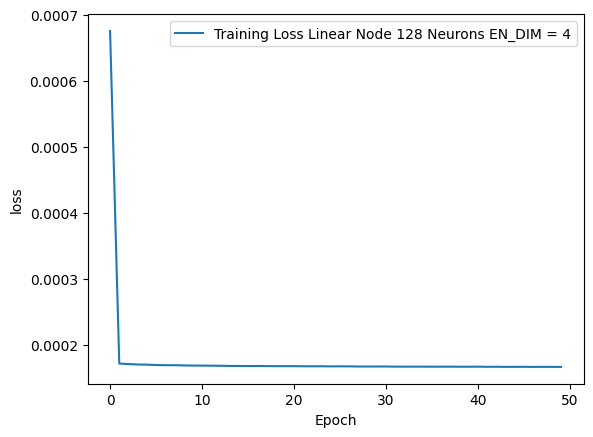

In [255]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss Linear Node 128 Neurons EN_DIM = 4')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [256]:
decoded_data = autoencoder.predict(normalized_data)

In [257]:
decoded_data[0].shape

(4,)

In [258]:
recon_data_standardized = min_max_scaler.inverse_transform(decoded_data)
print(recon_data_standardized)


[[-1.8838656e+03  2.5561211e+00 -1.5311731e+00  2.1147185e-05]
 [-1.8748094e+03  2.4626870e+00 -3.2945064e-01  2.5472056e-05]
 [-1.8406781e+03  2.4831467e+00 -1.4954726e+00  2.0911481e-05]
 ...
 [ 6.9009266e+00  2.9713261e+01  4.8593616e+00  3.0268728e-05]
 [ 6.9009266e+00  2.9713287e+01  4.8593154e+00  3.0268669e-05]
 [ 6.9007521e+00  2.9713274e+01  4.8593373e+00  3.0268699e-05]]


### 6. Autoencoder Error

In [259]:
import math
def my_rmse(np_arr1,np_arr2):
    dim = np_arr1.shape
    tot_loss = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            tot_loss += math.pow((np_arr1[i,j] - np_arr2[i,j]),2)
    return round(math.sqrt(tot_loss/(dim[0]* dim[1]*1.0)),2)

In [260]:

error_ae = my_rmse(combined_data,recon_data_standardized)

error_ae

19.85

In [261]:
num_points = data.n_points

# Ensure that the number of rows in the reconstructed data matches the number of points
if num_points != recon_data_standardized.shape[0]:
    raise ValueError("The number of points in the VTK data and reconstructed data do not match.")

# Create new arrays for the reconstructed data
data.point_data["p_auto"] = recon_data_standardized[:, 0]
data.point_data["U_auto"] = recon_data_standardized[:, 1:]



### 7. PCA

In [262]:
from sklearn.decomposition import PCA


# Perform PCA
pca = PCA(n_components=2)
pca.fit(combined_data)

# Access the principal components
principal_components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Print the results
print("Principal Components:")
print(principal_components)


Principal Components:
[[-9.9981195e-01  1.0447821e-02  1.6333641e-02  1.4336210e-24]
 [-9.1262031e-03 -9.9683321e-01  7.8993499e-02  2.7125127e-22]]


In [263]:

transformed_data = pca.transform(combined_data)

# Reconstruct the data from the PCA space
reconstructed_data_pca = pca.inverse_transform(transformed_data)

# The 'reconstructed_data' will contain the reconstructed data

# If you want to access the individual variables, you can split the data
pca_pressure_data = reconstructed_data_pca[:, 0]
pca_velocity_data = reconstructed_data_pca[:, 1]

# Now, 'reconstructed_pressure_data' and 'reconstructed_velocity_data' contain the reconstructed values for pressure and velocity, respectively

In [264]:
reconstructed_data_pca.shape

(999000, 4)

In [265]:
num_points = data.n_points

# Ensure that the number of rows in the reconstructed data matches the number of points
if num_points != recon_data_standardized.shape[0]:
    raise ValueError("The number of points in the VTK data and reconstructed data do not match.")

# Create new arrays for the reconstructed data
data.point_data["p_auto"] = recon_data_standardized[:, 0]
data.point_data["U_auto"] = recon_data_standardized[:, 1:]





num_points = data.n_points

# Ensure that the number of rows in the reconstructed data matches the number of points
if num_points != reconstructed_data_pca.shape[0]:
    raise ValueError("The number of points in the VTK data and reconstructed data do not match.")

# Create new arrays for the reconstructed data
data.point_data["p_pca"] = reconstructed_data_pca[:, 0]
data.point_data["U_pca"] = reconstructed_data_pca[:, 1:]

### 8. PCA

In [266]:
error_pca = my_rmse(combined_data,reconstructed_data_pca)

error_pca

2.69

In [267]:
gain = (error_pca - error_ae)/error_pca * 100
print("Gain percent {}".format(round(gain,2)))

Gain percent -637.92


### 9. Sava New Data to Same VTK file 

In [248]:
# Save the updated VTK data with the new arrays
data.save("0012_en_dim_4_ae_pca_nl_128_swish_1st_order_optimizer.vtk")